In [40]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [41]:
df = pd.read_csv('listings Ottawa_Ontario_Canada.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,34220,https://www.airbnb.com/rooms/34220,"20,200,000,000,000.00",2020-11-08,Room available,<b>The space</b><br />This room is part of a t...,NaN,https://a0.muscache.com/pictures/192935/3bf5a8...,147438,https://www.airbnb.com/users/show/147438,Mark,2010-06-18,CA,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1,1,[],f,f,NaN,Capital,NaN,45.41,-75.68,Private room in apartment,Private room,2,NaN,1 bath,1.00,1.00,"[""Wifi"", ""Heating"", ""Free parking on premises""...",$202.00,7,31,7,7,31,31,7.00,31.00,NaN,t,30,60,90,365,2020-11-08,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,36642,https://www.airbnb.com/rooms/36642,"20,200,000,000,000.00",2020-11-08,City Conveniences A Country Setting,<b>The space</b><br />Are you planning a vacat...,NaN,https://a0.muscache.com/pictures/7542487/52136...,157787,https://www.airbnb.com/users/show/157787,Donna,2010-07-04,"Ottawa, Ontario, Canada",I am originally from Nova Scotia but I have li...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/157787/profil...,https://a0.muscache.com/im/users/157787/profil...,NaN,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Kitchissippi,NaN,45.40,-75.75,Private room in house,Private room,2,NaN,2 baths,1.00,1.00,"[""Private living room"", ""Hair dryer"", ""Hangers...",$65.00,3,14,3,3,14,14,3.00,14.00,NaN,t,0,0,0,191,2020-11-08,87,1,0,2010-07-11,2020-02-17,94.00,10.00,10.00,10.00,10.00,10.00,9.00,NaN,f,1,0,1,0,0.69
2,59258,https://www.airbnb.com/rooms/59258,"20,200,000,000,000.00",2020-11-08,Lower level of my house to rent,"Lower 1/2 of bungalow, a separate entrance, 10...",NaN,https://a0.muscache.com/pictures/359337/5d90d6...,284351,https://www.airbnb.com/users/show/284351,Elena,2010-11-11,"Ottawa, Ontario, Canada",Canada rocks!,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/284351/profil...,https://a0.muscache.com/im/users/284351/profil...,NaN,1,1,"['email', 'phone', 'reviews', 'offline_governm...",t,t,NaN,Bay,NaN,45.36,-75.80,Entire apartment,Entire home/apt,4,NaN,1 bath,1.00,1.00,"[""Wifi"", ""Heating"", ""Dryer"", ""TV"", ""Washer"", ""...",$200.00,3,730,3,3,730,730,3.00,730.00,NaN,t,0,0,0,0,2020-11-08,1,0,0,2011-07-04,2011-07-04,100.00,10.00,8.00,10.00,10.00,10.00,10.00,NaN,f,1,1,0,0,0.01
3,158824,https://www.airbnb.com/rooms/158824,"20,200,000,000,000.00",2020-11-08,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,Big 3 bedroom house with backyard in desirable...,Very popular neighbourhood surrounded by milli...,https://a0.muscache.com/pictures/82249081/0a7b...,87296,https://www.airbnb.com/users/show/87296,Luc,2010-03-02,"Ottawa, Ontario, Canada",World Traveler always interested to 

In [42]:
# duplicates variables

print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(2669, 74)
(2669, 74)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669 entries, 0 to 2668
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2669 non-null   int64  
 1   listing_url                                   2669 non-null   object 
 2   scrape_id                                     2669 non-null   float64
 3   last_scraped                                  2669 non-null   object 
 4   name                                          2669 non-null   object 
 5   description                                   2574 non-null   object 
 6   neighborhood_overview                         1827 non-null   object 
 7   picture_url                                   2669 non-null   object 
 8   host_id                                       2669 non-null   int64  
 9   host_url                                      2669 non-null   o

In [44]:
# pd.set_option('display.max_rows', None)

# Examine data quality

In [45]:
# Check rate of missing values

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
percent_missing

id                                               0.00
listing_url                                      0.00
scrape_id                                        0.00
last_scraped                                     0.00
name                                             0.00
description                                      3.56
neighborhood_overview                           31.55
picture_url                                      0.00
host_id                                          0.00
host_url                                         0.00
host_name                                        0.00
host_since                                       0.00
host_location                                    0.07
host_about                                      39.72
host_response_time                              28.89
host_response_rate                              28.89
host_acceptance_rate                            17.42
host_is_superhost                                0.00
host_thumbnail_url          

In [46]:
# df.review_scores_rating.fillna(0, inplace = True)
print(df.review_scores_rating.unique())

[ nan  94. 100.  95.  99.  96.  92.  90.  98.  97.  91.  93.  84.  89.
  87.  88.  80.  86.  85.  70.  20.  67.  82.  60.  81.  73.  50.  83.
  77.  76.  40.  74.  75.  78.]


In [47]:
# df.review_scores_accuracy.fillna(0, inplace = True)
print(df.review_scores_accuracy.unique())

[nan 10.  9.  8.  2.  6.  7.  3.  4.  5.]


In [48]:
# df.review_scores_cleanliness.fillna(0, inplace = True)
print(df.review_scores_cleanliness.unique())

[nan 10.  8.  9.  2.  7.  4.  6.  5.]


In [49]:
# df.review_scores_checkin.fillna(0, inplace = True)
print(df.review_scores_checkin.unique())

[nan 10.  9.  8.  7.  2.  6.  4.]


In [50]:
# df.review_scores_communication.fillna(0, inplace = True)
print(df.review_scores_communication.unique())

[nan 10.  9.  7.  2.  8.  6.  4.]


In [51]:
# df.review_scores_location.fillna(0, inplace = True)
print(df.review_scores_location.unique())

[nan 10.  9.  8.  7.  2.  6.  4.]


In [52]:
# df.review_scores_value.fillna(0, inplace = True)
print(df.review_scores_value.unique())

[nan  9. 10.  8.  6.  2.  7.  4.  3.  5.]


# Drop irrelevant features

In [53]:
# remove columns with 100% & 75% missing value reate

df = df.drop(labels=['host_neighbourhood','neighbourhood_group_cleansed','bathrooms','calendar_updated','license','neighbourhood'], axis=1)

# Covert data format

## character to numeric

In [54]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip("%").astype(float)/100
# df.host_acceptance_rate.fillna(0, inplace = True)
print(df.host_acceptance_rate.unique())

[ nan 1.   0.71 0.   0.95 0.97 0.7  0.67 0.25 0.91 0.77 0.82 0.38 0.27
 0.99 0.94 0.92 0.33 0.75 0.79 0.8  0.65 0.47 0.2  0.86 0.93 0.5  0.57
 0.89 0.46 0.96 0.9  0.73 0.88 0.98 0.85 0.83 0.13 0.62 0.32 0.58 0.39
 0.6  0.61 0.54 0.87 0.53 0.69 0.4  0.74 0.81 0.44 0.23 0.84 0.56 0.63
 0.41 0.72 0.78 0.68 0.14 0.43 0.59 0.66 0.64 0.76 0.29 0.55]


In [55]:
pd.options.display.float_format = '{:,.2f}'.format
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,34220,https://www.airbnb.com/rooms/34220,"20,200,000,000,000.00",2020-11-08,Room available,<b>The space</b><br />This room is part of a t...,NaN,https://a0.muscache.com/pictures/192935/3bf5a8...,147438,https://www.airbnb.com/users/show/147438,Mark,2010-06-18,CA,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,1,1,[],f,f,Capital,45.41,-75.68,Private room in apartment,Private room,2,1 bath,1.00,1.00,"[""Wifi"", ""Heating"", ""Free parking on premises""...",$202.00,7,31,7,7,31,31,7.00,31.00,t,30,60,90,365,2020-11-08,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,36642,https://www.airbnb.com/rooms/36642,"20,200,000,000,000.00",2020-11-08,City Conveniences A Country Setting,<b>The space</b><br />Are you planning a vacat...,NaN,https://a0.muscache.com/pictures/7542487/52136...,157787,https://www.airbnb.com/users/show/157787,Donna,2010-07-04,"Ottawa, Ontario, Canada",I am originally from Nova Scotia but I have li...,NaN,NaN,1.00,f,https://a0.muscache.com/im/users/157787/profil...,https://a0.muscache.com/im/users/157787/profil...,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,Kitchissippi,45.40,-75.75,Private room in house,Private room,2,2 baths,1.00,1.00,"[""Private living room"", ""Hair dryer"", ""Hangers...",$65.00,3,14,3,3,14,14,3.00,14.00,t,0,0,0,191,2020-11-08,87,1,0,2010-07-11,2020-02-17,94.00,10.00,10.00,10.00,10.00,10.00,9.00,f,1,0,1,0,0.69
2,59258,https://www.airbnb.com/rooms/59258,"20,200,000,000,000.00",2020-11-08,Lower level of my house to rent,"Lower 1/2 of bungalow, a separate entrance, 10...",NaN,https://a0.muscache.com/pictures/359337/5d90d6...,284351,https://www.airbnb.com/users/show/284351,Elena,2010-11-11,"Ottawa, Ontario, Canada",Canada rocks!,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/284351/profil...,https://a0.muscache.com/im/users/284351/profil...,1,1,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Bay,45.36,-75.80,Entire apartment,Entire home/apt,4,1 bath,1.00,1.00,"[""Wifi"", ""Heating"", ""Dryer"", ""TV"", ""Washer"", ""...",$200.00,3,730,3,3,730,730,3.00,730.00,t,0,0,0,0,2020-11-08,1,0,0,2011-07-04,2011-07-04,100.00,10.00,8.00,10.00,10.00,10.00,10.00,f,1,1,0,0,0.01
3,158824,https://www.airbnb.com/rooms/158824,"20,200,000,000,000.00",2020-11-08,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,Big 3 bedroom house with backyard in desirable...,Very popular neighbourhood surrounded by milli...,https://a0.muscache.com/pictures/82249081/0a7b...,87296,https://www.airbnb.com/users/show/87296,Luc,2010-03-02,"Ottawa, Ontario, Canada",World Traveler always interested to meet new p...,within an hour,100%,1.00,f,https://a0.muscache.com/im/pictures/user/576b9...,https://a0.muscache.com/im/pictures/user/576b9...,2,2,"['email', 'phone', 'rev

In [56]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip("%").astype(float)/100
# df.host_response_rate.fillna(0, inplace = True)
print(df.host_response_rate.unique())

[ nan 1.   0.71 0.8  0.9  0.   0.67 0.33 0.5  0.89 0.91 0.92 0.75 0.6
 0.17 0.93 0.94 0.97 0.99 0.4  0.86 0.83 0.85 0.25 0.88 0.7  0.95 0.47
 0.96 0.63 0.98 0.2  0.78]


## boolean to numeric

In [57]:
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})

In [58]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})

In [59]:
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})

In [60]:
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0})

In [61]:
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})

In [62]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,34220,https://www.airbnb.com/rooms/34220,"20,200,000,000,000.00",2020-11-08,Room available,<b>The space</b><br />This room is part of a t...,NaN,https://a0.muscache.com/pictures/192935/3bf5a8...,147438,https://www.airbnb.com/users/show/147438,Mark,2010-06-18,CA,NaN,NaN,NaN,NaN,0,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,1,1,[],0,0,Capital,45.41,-75.68,Private room in apartment,Private room,2,1 bath,1.00,1.00,"[""Wifi"", ""Heating"", ""Free parking on premises""...",$202.00,7,31,7,7,31,31,7.00,31.00,1,30,60,90,365,2020-11-08,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,0,NaN
1,36642,https://www.airbnb.com/rooms/36642,"20,200,000,000,000.00",2020-11-08,City Conveniences A Country Setting,<b>The space</b><br />Are you planning a vacat...,NaN,https://a0.muscache.com/pictures/7542487/52136...,157787,https://www.airbnb.com/users/show/157787,Donna,2010-07-04,"Ottawa, Ontario, Canada",I am originally from Nova Scotia but I have li...,NaN,NaN,1.00,0,https://a0.muscache.com/im/users/157787/profil...,https://a0.muscache.com/im/users/157787/profil...,1,1,"['email', 'phone', 'facebook', 'reviews']",1,0,Kitchissippi,45.40,-75.75,Private room in house,Private room,2,2 baths,1.00,1.00,"[""Private living room"", ""Hair dryer"", ""Hangers...",$65.00,3,14,3,3,14,14,3.00,14.00,1,0,0,0,191,2020-11-08,87,1,0,2010-07-11,2020-02-17,94.00,10.00,10.00,10.00,10.00,10.00,9.00,0,1,0,1,0,0.69
2,59258,https://www.airbnb.com/rooms/59258,"20,200,000,000,000.00",2020-11-08,Lower level of my house to rent,"Lower 1/2 of bungalow, a separate entrance, 10...",NaN,https://a0.muscache.com/pictures/359337/5d90d6...,284351,https://www.airbnb.com/users/show/284351,Elena,2010-11-11,"Ottawa, Ontario, Canada",Canada rocks!,NaN,NaN,NaN,0,https://a0.muscache.com/im/users/284351/profil...,https://a0.muscache.com/im/users/284351/profil...,1,1,"['email', 'phone', 'reviews', 'offline_governm...",1,1,Bay,45.36,-75.80,Entire apartment,Entire home/apt,4,1 bath,1.00,1.00,"[""Wifi"", ""Heating"", ""Dryer"", ""TV"", ""Washer"", ""...",$200.00,3,730,3,3,730,730,3.00,730.00,1,0,0,0,0,2020-11-08,1,0,0,2011-07-04,2011-07-04,100.00,10.00,8.00,10.00,10.00,10.00,10.00,0,1,1,0,0,0.01
3,158824,https://www.airbnb.com/rooms/158824,"20,200,000,000,000.00",2020-11-08,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,Big 3 bedroom house with backyard in desirable...,Very popular neighbourhood surrounded by milli...,https://a0.muscache.com/pictures/82249081/0a7b...,87296,https://www.airbnb.com/users/show/87296,Luc,2010-03-02,"Ottawa, Ontario, Canada",World Traveler always interested to meet new p...,within an hour,1.00,1.00,0,https://a0.muscache.com/im/pictures/user/576b9...,https://a0.muscache.com/im/pictures/user/576b9...,2,2,"['email', 'phone', 'rev

# Understand specific variables
## Check property_type & room_type

<AxesSubplot:xlabel='count', ylabel='property_type'>

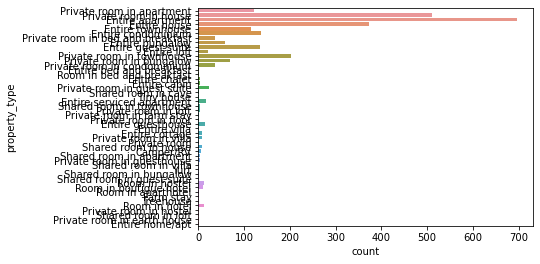

In [63]:
sns.countplot(y = 'property_type', data=df)

In [64]:
print(df.property_type.unique())

['Private room in apartment' 'Private room in house' 'Entire apartment'
 'Entire house' 'Entire townhouse' 'Entire condominium'
 'Private room in bed and breakfast' 'Entire bungalow'
 'Entire guest suite' 'Entire loft' 'Private room in townhouse'
 'Private room in bungalow' 'Private room in condominium'
 'Entire bed and breakfast' 'Room in bed and breakfast' 'Entire chalet'
 'Entire cabin' 'Private room in guest suite' 'Shared room in cave'
 'Tiny house' 'Entire serviced apartment' 'Shared room in townhouse'
 'Private room in loft' 'Private room in farm stay'
 'Private room in floor' 'Entire guesthouse' 'Entire villa'
 'Entire cottage' 'Private room in villa' 'Private room'
 'Shared room in house' 'Camper/RV' 'Shared room in apartment'
 'Private room in guesthouse' 'Shared room in villa' 'Yurt'
 'Shared room in bungalow' 'Shared room in guest suite' 'Room in hostel'
 'Room in boutique hotel' 'Room in aparthotel' 'Farm stay' 'Treehouse'
 'Room in hotel' 'Private room in hostel' 'Shared 

<AxesSubplot:xlabel='count', ylabel='room_type'>

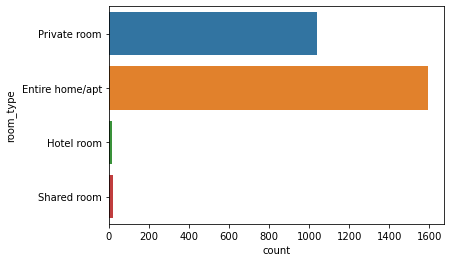

In [65]:
sns.countplot(y = 'room_type', data=df)

In [66]:
#df = pd.get_dummies(df, columns=['room_type'])
#df.head()

In [67]:
#df['bathroom']=df['bathrooms_text'].str.extract('(\d+)')

In [68]:
#df.head()

In [69]:
#print(df.bathroom.unique())

In [70]:
#nan_in_bathroom = df[df['bathroom'].isna()]
#nan_in_bathroom

In [71]:
#replace NaN by 0? or REMOVE? (0.07% missing value rate -- very low!)

#df.bathroom.fillna(0, inplace = True)

In [72]:
#df['bathroom'] = df['bathroom'].astype(int)

In [73]:
#df.drop('bathrooms_text', inplace=True, axis=1)

In [74]:
#df.head()

In [75]:
# df.to_csv('final.csv')